In [1]:
import numpy as np
import os, pickle
from itertools import product
import pandas as pd

import sys
sys.path.append('/mnt/disk1/yunseob/Pytorch/1_CapsuleEndo/algorithms')
from ce_utils.data import test_data_load, imshow
from ce_model.cnn_inf import cnn_model
from ce_utils.cls_eval import cls_metric, extract_score, test_by_category

In [2]:
np_test_name, np_test_X, np_test_Y = test_data_load('data_config_np-hd_frb_sv.pkl')

1005
1362


In [3]:
root = '/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed'
label_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed'

label = pd.read_csv(label_dir + '/label.csv', index_col = 0)

In [4]:
label[label.source == '200121 validation']

,negative,positive,hemorrhagic,red_spot,angioectasia,active_bleeding,depressed,erosion,ulcer,stricture,protruded,ampulla_of_vater,lymphoid_follicles,small_bowel_tumor,etc,phlebectasia,lymphangiectasia,source
광김___00-40-37___2008926.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,200121 validation
광김___00-44-00___2009740.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,200121 validation
광김___00-44-56___2010000.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,200121 validation
광김___00-45-06___2010020.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,200121 validation
광김___00-45-10___2010028.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,200121 validation
광김___00-45-17___2010043.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,200121 validation
광김___01-10-17___2014615.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,200121 validation
광김___01-10-25___2014655.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,200121 validation
광김___01-18-46___2017022.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,200121 validation
광김___01-18-47___2017023.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,200121 validation


In [5]:
for i in label[label.source == '200121 validation'].index.values:
    if label.loc[i]['hemorrhagic'] and label.loc[i]['depressed']:
        print(i)

광주___05-18-18___2055287.jpg
필강___00-01-22___2000401.jpg
필강___00-01-23___2000407.jpg
SK___03-46-11___2038295.jpg
SK___03-46-19___2038311.jpg
봉한___09-41-15___2086943.jpg
봉한___09-41-20___2086953.jpg
봉한___10-08-32___2090218.jpg
봉한___10-54-14___2095703.jpg
봉한___11-01-44___2096604.jpg
순이___00-36-10___2008986__아래부분.jpg
순이___01-01-28___2014387.jpg
순이___01-02-05___2014461.jpg
영오___01-06-18___2016024.jpg
장한___08-02-01___2074926.jpg
장한___08-02-02___2074927.jpg
재조___02-07-02___2028110.jpg
종고___06-26-44___2063495.jpg
종고___11-40-57___2101211.jpg
한고___04-35-19___2045236.jpg
SK___03-47-54___2038519.jpg
종고___06-58-03___2067254.jpg
종고___11-40-39___2101176.jpg
종고___11-42-04___2101345.jpg
종고___12-44-48___2108875.jpg
종고___12-46-16___2109052.jpg
종고___12-52-39___2109817.jpg
이승___01-37-59___2018238.jpg
인명___12-38-11___2108215.jpg
정광___04-21-07___2048465.jpg
정이___04-52-23___2048027.jpg
경신___01-26-24___2017848.jpg
경신___02-44-51___2029579.jpg
경신___02-44-54___2029584.jpg


# Load model

In [6]:
!nvidia-smi

Tue Nov  3 15:50:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.26       Driver Version: 430.26       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  On   | 00000000:1D:00.0 Off |                  N/A |
| 27%   23C    P8     2W / 250W |    909MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  On   | 00000000:1E:00.0 Off |                  N/A |
| 27%   23C    P8     7W / 250W |     10MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [8]:
gpu_idx = 3

model_dir = '/mnt/disk1/yunseob/Pytorch/1_CapsuleEndo/model_developlment/1_detection_localization/2_data_aug/model/'

np_hd_000_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_---_0', gpu_idx = gpu_idx)

np_hd_100_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_f--', gpu_idx = gpu_idx)

np_hd_010_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_-r-', gpu_idx = gpu_idx)

np_hd_001_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_--b', gpu_idx = gpu_idx)

np_hd_110_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_fr-', gpu_idx = gpu_idx)

np_hd_111_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_frb_0', gpu_idx = gpu_idx)

np_hd_111_sv_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_frb_sv', gpu_idx = gpu_idx)

np_hd_100_2_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir + 'model/', model_name = 'B_f--_re', gpu_idx = gpu_idx)

np_hd_001_2_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir + 'model/', model_name = 'B_--b_re', gpu_idx = gpu_idx)

model:
B_---_0.0001_16_2007142232_069_t_accr_0.9656_t_loss_0.347245_v_accr_0.9503_v_loss_0.364293.pt

model:
B_f--_0.0001_8_2007151017_037_t_accr_0.9627_t_loss_0.350014_v_accr_0.9537_v_loss_0.357257.pt

model:
B_-r-_0.0001_8_2007161324_046_t_accr_0.9800_t_loss_0.333166_v_accr_0.9740_v_loss_0.339054.pt

model:
B_--b_0.0001_8_2007170631_037_t_accr_0.9913_t_loss_0.322011_v_accr_0.9571_v_loss_0.356080.pt

model:
B_fr-_0.0001_16_2007190546_044_t_accr_0.9783_t_loss_0.334562_v_accr_0.9672_v_loss_0.346381.pt

model:
B_frb_0.0001_32_2007230941_010_t_accr_0.9827_t_loss_0.329607_v_accr_0.9751_v_loss_0.336306.pt

model:
B_frb_sv_0.0001_32_2007290554_016_t_accr_0.9961_t_loss_0.317016_v_accr_0.9774_v_loss_0.334313.pt

model:
B_f--_re_0.0001_16_2010302128_057_t_accr_0.9683_t_loss_0.344012_v_accr_0.9589_v_loss_0.354011.pt
B_f--_re_v2_0.0001_16_2011021249_050_t_accr_0.9851_t_loss_0.328059_v_accr_0.9598_v_loss_0.354353.pt
The last model is selected

model:
B_--b_re_0.0001_16_2010302140_030_t_accr_0.9719

In [9]:
np_hd_000_score = extract_score(np_hd_000_model, np_test_X, np_test_Y)
np_hd_100_score = extract_score(np_hd_100_model, np_test_X, np_test_Y)
np_hd_010_score = extract_score(np_hd_010_model, np_test_X, np_test_Y)
np_hd_001_score = extract_score(np_hd_001_model, np_test_X, np_test_Y)
np_hd_110_score = extract_score(np_hd_110_model, np_test_X, np_test_Y)
np_hd_111_score = extract_score(np_hd_111_model, np_test_X, np_test_Y)
np_hd_111_sv_score = extract_score(np_hd_111_sv_model, np_test_X, np_test_Y)

np_hd_100_2_score = extract_score(np_hd_100_2_model, np_test_X, np_test_Y)
np_hd_001_2_score = extract_score(np_hd_001_2_model, np_test_X, np_test_Y)

2367: 119(*20) |################################################## | 100.0% prediction
2367: 119(*20) |################################################## | 100.0% prediction
2367: 119(*20) |################################################## | 100.0% prediction
2367: 119(*20) |################################################## | 100.0% prediction
2367: 119(*20) |################################################## | 100.0% prediction
2367: 119(*20) |################################################## | 100.0% prediction
2367: 119(*20) |################################################## | 100.0% prediction
2367: 119(*20) |################################################## | 100.0% prediction
2367: 119(*20) |################################################## | 100.0% prediction


In [17]:
model_list = ['-', 'flip (f)', 'rotate (r)', 'blur (b)', 'f + r', 
              'f + r + b', 'f + r + b + sv', 
              'f re-training', 'b re-training']

score_list = [np_hd_000_score, np_hd_100_score, np_hd_010_score, np_hd_001_score,
              np_hd_110_score, np_hd_111_score, np_hd_111_sv_score, np_hd_100_2_score, np_hd_001_2_score]

np_hd_df = pd.DataFrame(columns = ['model', 'Accr', 'Sens', 'Spec', 'NPV', 'PPV'])

for i, model, score in zip(range(len(model_list)), model_list, score_list):
#     df.loc[i] = [model.model_name] + cls_metric(test_Y, score).cm2metric()
    np_hd_df.loc[i] = [model] + cls_metric(np_test_Y, score).cm2metric()
    
np_hd_df

,model,Accr,Sens,Spec,NPV,PPV
0,-,83.52,85.90,80.30,80.78,85.53
1,flip (f),85.34,83.33,88.06,79.59,90.44
2,rotate (r),87.71,89.94,84.68,86.13,88.83
3,blur (b),84.41,83.77,85.27,79.50,88.52
4,f + r,83.95,86.64,80.30,81.60,85.63
5,f + r + b,88.09,90.60,84.68,86.93,88.90
6,f + r + b + sv,86.86,90.75,81.59,86.68,86.98
7,f re-training,86.19,86.27,86.07,82.22,89.35
8,b re-training,84.96,83.04,87.56,79.21,90.05


In [19]:
def test_by_category(model, filename, X, Y, target_category = None):
    def extract_accr(model, x, y):
    
        model.evaluation(x, y, batch_size = 20, print_accr = False)
        return model.accr
    
    label_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed'
    label = pd.read_csv(label_dir + '/label.csv', index_col = 0)
    
    accrs = []
    if target_category == None:
        target_category = label.columns[:-1]
    for category in target_category:
    
        x, y = [], []
        for name, img, cls in zip(filename, X, Y):
            if label.loc[('').join(name.split('__c_-_-_-'))][category] == 1:
                x.append(img)
                y.append(cls)

        x = np.concatenate([x])
        y = np.asarray(y)
    
        accrs.append(extract_accr(model, x, y)) 
        
    print()
    return accrs

In [23]:
targets = ['red_spot', 'angioectasia', 'active_bleeding', 'erosion', 'ulcer', 'stricture']

np_hd_000_accrs = test_by_category(np_hd_000_model, np_test_name, np_test_X, np_test_Y, targets)
np_hd_100_accrs = test_by_category(np_hd_100_model, np_test_name, np_test_X, np_test_Y, targets)
np_hd_010_accrs = test_by_category(np_hd_010_model, np_test_name, np_test_X, np_test_Y, targets)
np_hd_001_accrs = test_by_category(np_hd_001_model, np_test_name, np_test_X, np_test_Y, targets)
np_hd_110_accrs = test_by_category(np_hd_110_model, np_test_name, np_test_X, np_test_Y, targets)
np_hd_111_accrs = test_by_category(np_hd_111_model, np_test_name, np_test_X, np_test_Y, targets)
np_hd_111_sv_accrs = test_by_category(np_hd_111_sv_model, np_test_name, np_test_X, np_test_Y, targets)

np_hd_100_2_accrs = test_by_category(np_hd_100_2_model, np_test_name, np_test_X, np_test_Y, targets)
np_hd_001_2_accrs = test_by_category(np_hd_001_2_model, np_test_name, np_test_X, np_test_Y, targets)

370: 19(*20) |################################################## | 100.0% prediction
2: 1(*20) |################################################## | 100.0% prediction
293: 15(*20) |################################################## | 100.0% prediction
297: 15(*20) |################################################## | 100.0% prediction
410: 21(*20) |################################################## | 100.0% prediction
48: 3(*20) |################################################## | 100.0% prediction

370: 19(*20) |################################################## | 100.0% prediction
2: 1(*20) |################################################## | 100.0% prediction
293: 15(*20) |################################################## | 100.0% prediction
297: 15(*20) |################################################## | 100.0% prediction
410: 21(*20) |################################################## | 100.0% prediction
48: 3(*20) |################################################## | 100.0% 

In [24]:
model_list = ['-', 'flip (f)', 'rotate (r)', 'blur (b)', 'f + r', 
              'f + r + b', 'f + r + b + sv', 
              'f re-training', 'b re-training']

accrs_list = [np_hd_000_accrs, np_hd_100_accrs, np_hd_010_accrs, np_hd_001_accrs,
              np_hd_110_accrs, np_hd_111_accrs, np_hd_111_sv_accrs, np_hd_100_2_accrs, np_hd_001_2_accrs]

np_hd_df = pd.DataFrame(columns = ['model'] + targets)

for i, model, accrs in zip(range(len(model_list)), model_list, accrs_list):
#     df.loc[i] = [model.model_name] + cls_metric(test_Y, accrs).cm2metric()
    np_hd_df.loc[i] = [model] + accrs
    
np_hd_df

,model,red_spot,angioectasia,active_bleeding,erosion,ulcer,stricture
0,-,86.76,100.0,96.25,80.81,82.93,62.50
1,flip (f),85.14,100.0,94.54,77.10,79.51,72.92
2,rotate (r),90.00,100.0,95.22,89.90,86.59,85.42
3,blur (b),84.05,100.0,94.20,81.48,79.51,62.50
4,f + r,88.11,100.0,93.52,88.55,80.24,70.83
5,f + r + b,90.54,100.0,96.59,88.55,88.78,83.33
6,f + r + b + sv,91.08,100.0,96.25,87.54,90.00,75.00
7,f re-training,81.89,100.0,95.56,85.86,84.63,79.17
8,b re-training,78.11,100.0,95.22,82.15,80.49,70.83


## 2.3. ROC curves

In [25]:
from sklearn.metrics import roc_curve, auc

In [26]:
def ROCplot(labels, outputs, 
            xlim, ylim,  
            label_name = '', axis_line = None):
    fpr, tpr, _ = roc_curve(labels, outputs[:, 1])
    roc_auc = auc(fpr, tpr)
        
    gmeans = np.sqrt(tpr * (1-fpr))
    idx = np.argmax(gmeans)
    
    height = ylim[1] - ylim[0]
    width = xlim[1] - xlim[0]
    
    ax.plot(fpr, tpr, lw = 2, label='{} (AUC = {:.4f})'.format(label_name, roc_auc))
#     ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#     ax.plot(fpr[idx], tpr[idx], 'o', mfc = color, mec = color, ms = 3)
#     ax.plot(fpr[idx], tpr[idx], 'o', ms = 3)
    if axis_line is not None:
        ax.axvline(fpr[idx], color = 'k', linestyle='dashed', linewidth=1, ymax=(tpr[idx]- ylim[0])/height)
        ax.axhline(tpr[idx], color = 'k', linestyle='dashed', linewidth=1, xmax=(fpr[idx]- xlim[0])/width )

In [28]:
import matplotlib.pyplot as plt

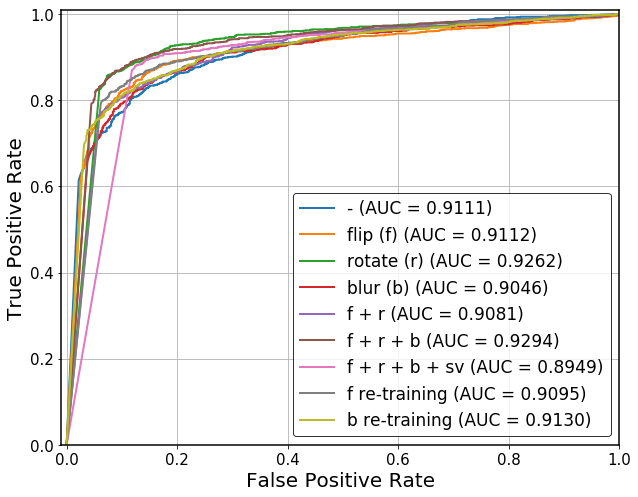

In [30]:
fig, ax = plt.subplots(1, 1, figsize= (10, 8))

ax.set_xlim([-0.01, 1.0])
ax.set_ylim([0.0, 1.01])

for i, model, score in zip(range(len(model_list)), model_list, score_list):
#     if i == 0 or i == 6:
#     ROCplot(test_Y, score, ax.get_xlim(), ax.get_ylim(), model.model_name)
    ROCplot(np_test_Y, score, ax.get_xlim(), ax.get_ylim(), model)


# ax.title('Receiver operating characteristic')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.tick_params(labelsize = 15)
ax.set_xlabel('False Positive Rate', fontsize = 20)
ax.set_ylabel('True Positive Rate', fontsize = 20)

ax.legend(fontsize = 17, borderpad = 0.4, edgecolor = 'k', loc="lower right")
# ax.set_xticks(); ax.set_yticks([])
# ax.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize = 15)
# ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize = 15)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.grid()

plt.show()

# fig.savefig('./results/ROC_curves.png', bbox_inches='tight')
# fig.savefig('./results/ROC_curves_validation_set.png', bbox_inches='tight')

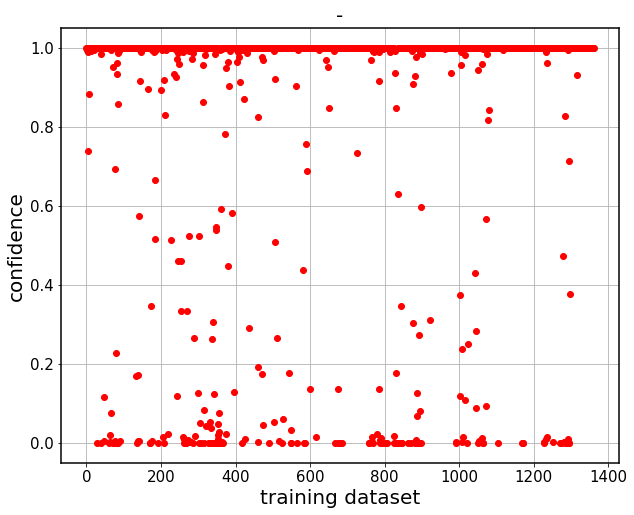

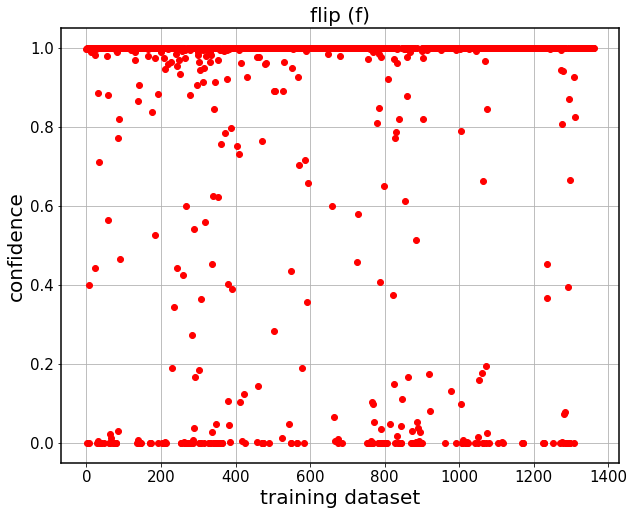

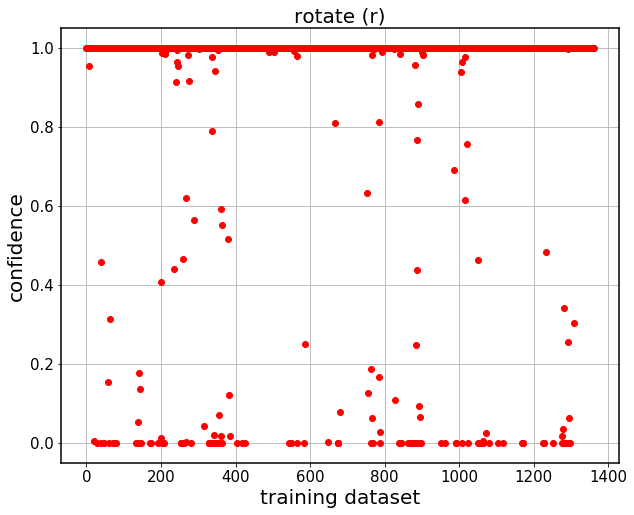

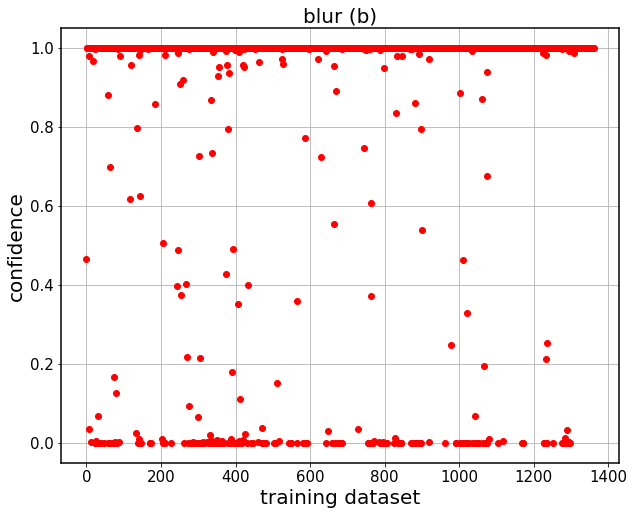

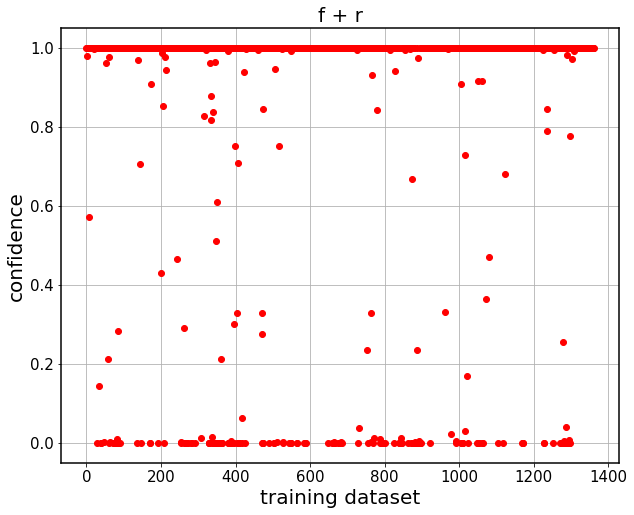

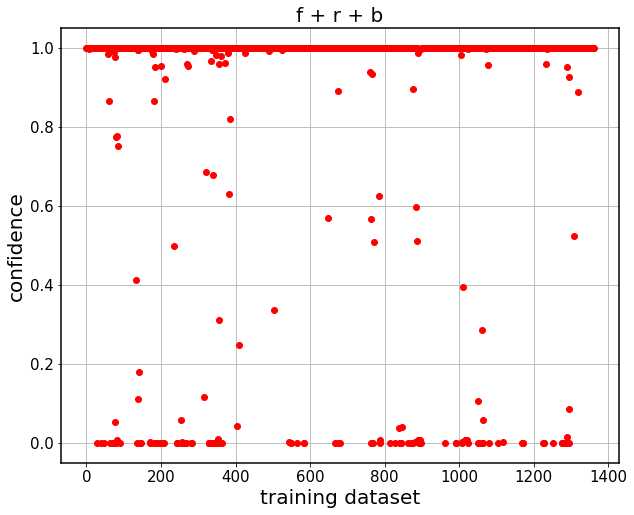

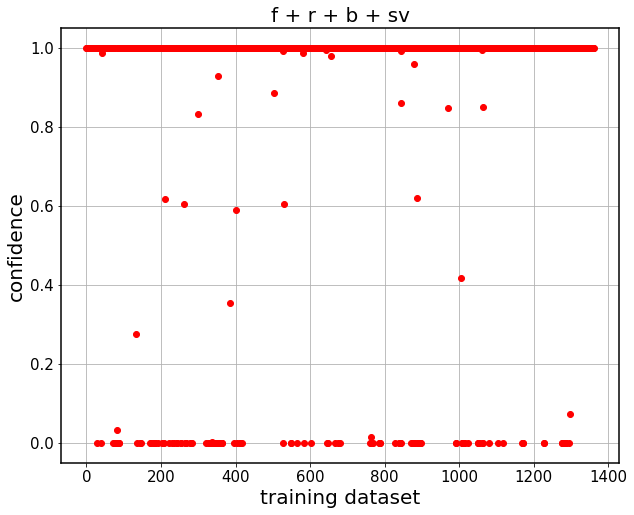

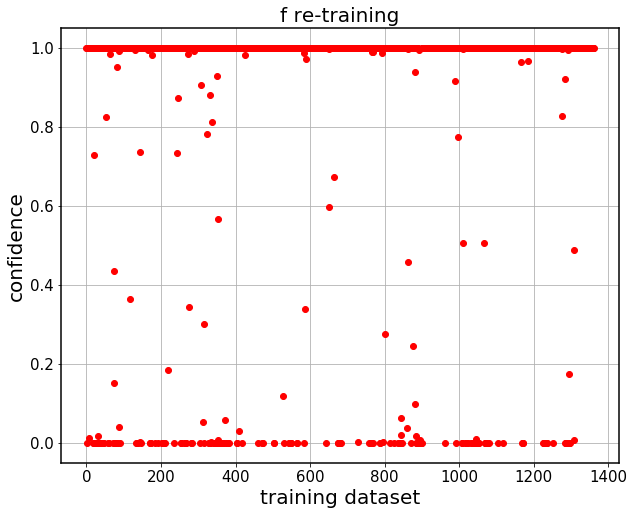

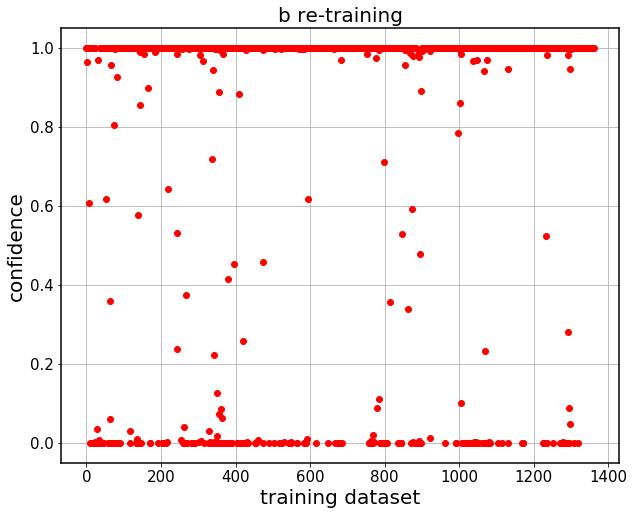

In [31]:
for i, model in enumerate(model_list):

    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111)
    ax.plot(score_list[i][np.where(np_test_Y == 1)[0], 1], 'o', color = 'r')

    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    ax.tick_params(labelsize = 15)
    ax.set_title('{}'.format(model), fontsize = 20)
    ax.set_xlabel('training dataset', fontsize = 20)
    ax.set_ylabel('confidence', fontsize = 20)

    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.grid()
    fig.show()

# 3. Conclusion


- f + r + b + sv같은 경우, testing set에 대해서도 가장 좋은 수치를 보여줬었는데, 
- training set과 가장 fit했던 것도 알 수 있었음. 

- issue
    - flip (f) 같은 경우 양성 오류가 많은 편인데, 모델 선택 기준이 validation set의 accr를 최우선하다보니 
    - 2배 정도 더 많은 negative class에 dominant하게 선택되어 덜 훈련된 모델이 선택되었을 가능성이 농후.